In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import warnings


![](https://cdn-images-1.medium.com/max/960/1*UgYbimgPXf6XXxMy2yqRLw.png)

![](https://images.spiceworks.com/wp-content/uploads/2022/04/11040522/46-4.png)

📈 **Logistic Regression Overview** 📊

**Definition:** Logistic Regression is a statistical method used for binary classification, predicting the probability of an observation belonging to one of two classes.

**Nature:** Despite its name, Logistic Regression is a classification algorithm, not a regression one. It's well-suited for problems like spam detection, medical diagnosis, and more.

**Function:** 📉 It employs the logistic function (sigmoid) to map input features to a value between 0 and 1, interpreting this value as the probability of the instance belonging to the positive class.

**Mathematics:** 🔢 The logistic function is represented as \( P(Y=1) = \frac{1}{1 + e^{-(b_0 + b_1X)}} \), where \( P(Y=1) \) is the probability of the positive class, \( X \) is the input feature, and \( b_0, b_1 \) are the coefficients.

**Training:** 🏋️‍♂️ Coefficients are determined through iterative optimization processes like gradient descent. The goal is to maximize the likelihood function.

**Decision Boundary:** 🚧 The algorithm establishes a decision boundary, classifying instances based on whether the predicted probability surpasses a certain threshold.

**Multiclass Logistic Regression:** 🌐 For more than two classes, extensions like multinomial logistic regression or one-vs-rest strategies are employed.

**Assumptions:** Logistic Regression assumes a linear relationship between features and the log-odds of the response variable. It is also sensitive to outliers.

**Interpretability:** 💬 Coefficients in logistic regression can be interpreted as the effect of a one-unit change in the predictor on the log-odds of the response.

**Use Cases:** 🧐 It's widely used in various fields, such as healthcare (disease prediction), finance (credit scoring), and social sciences (voter prediction).

Logistic Regression is a robust and interpretable tool in the data scientist's arsenal, balancing simplicity and effectiveness for binary classification tasks.

In [2]:
data = r'D:\MyWeb\logistic-regression\datasets\breast_cancer.csv'

df = pd.read_csv(data)

**Let us explore the data**

In [3]:
# view dimensions

df.shape

(683, 10)

In [4]:
# preview sample of the dataset

df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [5]:
# column names
df.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

Columns meaning 

**Clump thickness**
is a measure of how thick the cells are within a tumor. Benign cells tend to be grouped in mono-layers, while cancerous - in multi-layer.(Sarkar et al. 2017, p. 1)

**Uniformity**
of cell size and uniformity of cell shape are two characteristics that can be used to describe the appearance of cells under a microscope. Here we are checking the degree to which the cells in a sample are similar in size and shape.

**Marginal adhesion**
is the degree to which cells in a tissue sample adhere, or stick, to one another at the edges of the sample. Loss of adhesion might be a sign of malignancy.

**Single**
epithelial cell size is the size of individual cells in an epithelial tissue sample. Epithelial tissue is a type of tissue that covers the surface of the body and lines internal organs and structures. It is made up of cells that are tightly packed together and held in place by specialized junctions.

**Bare nuclei**
refers to cells in a tissue sample that are missing their cell membranes and cytoplasm, leaving only the nucleus visible.

**Bland**
chromatin is the appearance of the genetic material (chromatin) in the nucleus of a cell under a microscope. Chromatin is made up of DNA and proteins, and it contains the genetic information that controls the cell’s functions. When the chromatin in a cell’s nucleus is compact and uniform in appearance, it is said to be “bland.”

**Normal**
nucleoli are small, spherical structures found within the nucleus of a cell. They are composed of DNA, RNA, and proteins and are responsible for synthesizing ribosomes, which are the cellular structures that produce proteins. Nucleoli are usually visible under a microscope and can vary in size and appearance depending on the stage of the cell cycle and the cell’s function. In normal, healthy cells, nucleoli are usually small and have a distinct, well-defined border.

**Mitosis**
is the process of cell division that occurs in all living organisms. During mitosis, a single cell divides into two daughter cells, each of which contains a copy of the parent cell’s DNA. The process of mitosis is essential for the growth and repair of tissues and the production of new cells.

In [6]:
#summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [7]:
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


**Check for missing values**

In [8]:
df.isna().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [9]:
print(round(df.describe(),2))

       Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
count           683.00                   683.00                    683.00   
mean              4.44                     3.15                      3.22   
std               2.82                     3.07                      2.99   
min               1.00                     1.00                      1.00   
25%               2.00                     1.00                      1.00   
50%               4.00                     1.00                      1.00   
75%               6.00                     5.00                      5.00   
max              10.00                    10.00                     10.00   

       Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
count             683.00                       683.00       683.00   
mean                2.83                         3.23         3.54   
std                 2.86                         2.22         3.64   
min                 1.00  

Text(0, 0.5, 'Marginal Adhesion')

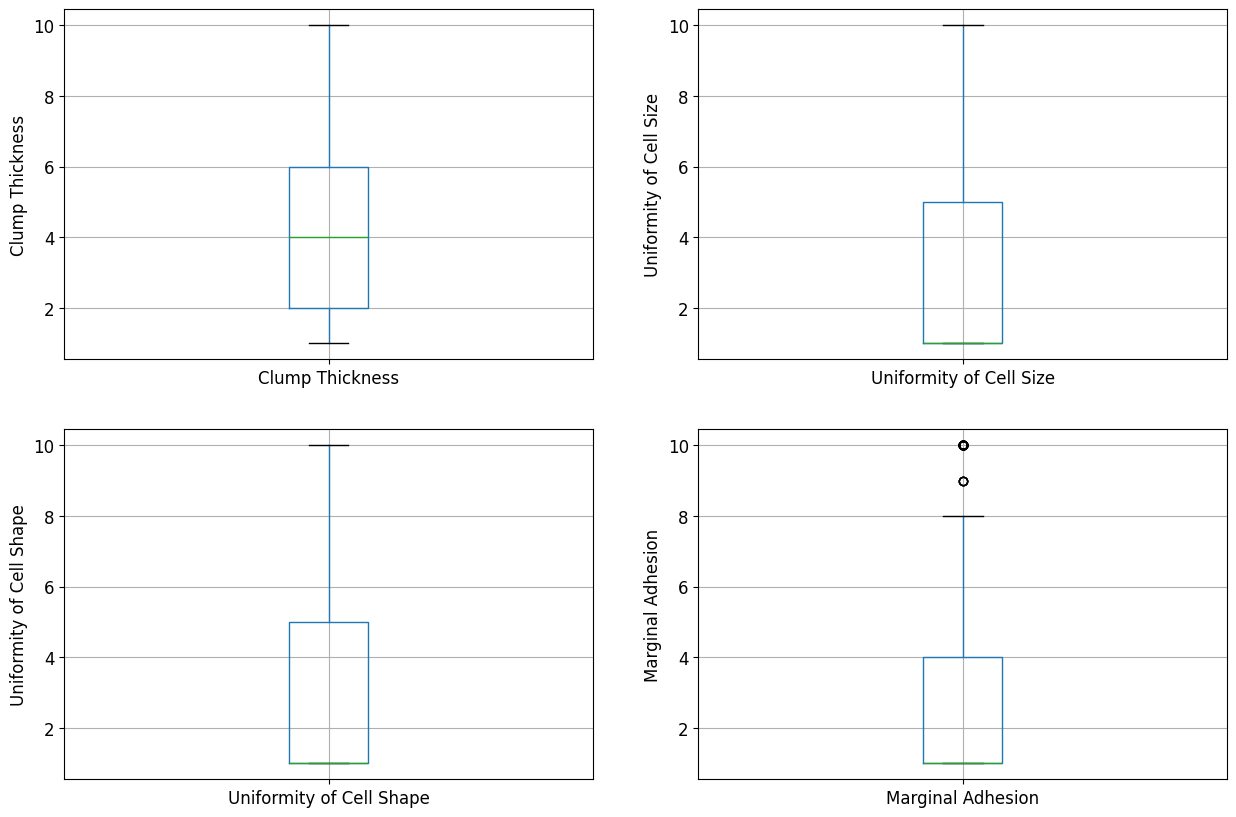

In [51]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Clump Thickness')
fig.set_title('')
fig.set_ylabel('Clump Thickness')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Uniformity of Cell Size')
fig.set_title('')
fig.set_ylabel('Uniformity of Cell Size')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='Uniformity of Cell Shape')
fig.set_title('')
fig.set_ylabel('Uniformity of Cell Shape')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='Marginal Adhesion')
fig.set_title('')
fig.set_ylabel('Marginal Adhesion')

Text(0, 0.5, 'Class')

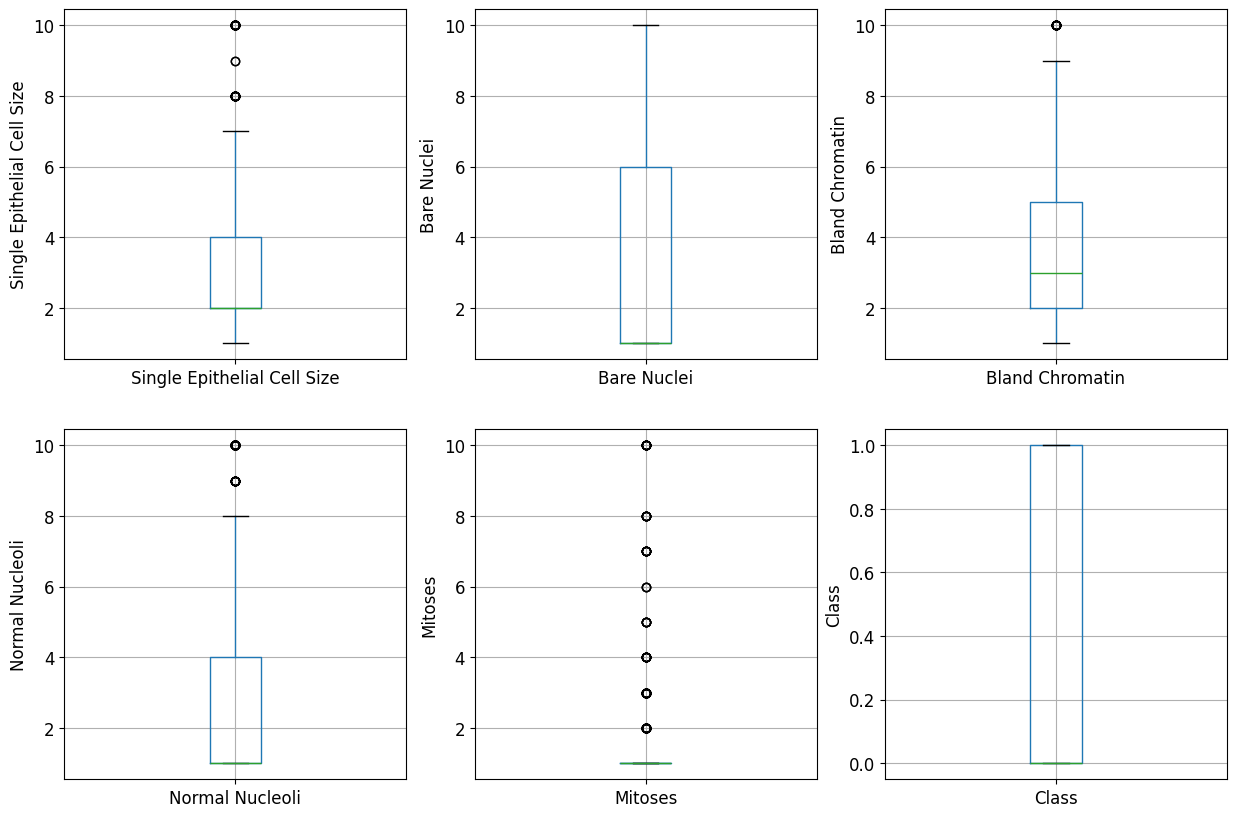

In [52]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 3, 1)
fig = df.boxplot(column='Single Epithelial Cell Size')
fig.set_title('')
fig.set_ylabel('Single Epithelial Cell Size')


plt.subplot(2, 3, 2)
fig = df.boxplot(column='Bare Nuclei')
fig.set_title('')
fig.set_ylabel('Bare Nuclei')


plt.subplot(2, 3, 3)
fig = df.boxplot(column='Bland Chromatin')
fig.set_title('')
fig.set_ylabel('Bland Chromatin')


plt.subplot(2, 3, 4)
fig = df.boxplot(column='Normal Nucleoli')
fig.set_title('')
fig.set_ylabel('Normal Nucleoli')

plt.subplot(2, 3, 5)
fig = df.boxplot(column='Mitoses')
fig.set_title('')
fig.set_ylabel('Mitoses')

plt.subplot(2, 3, 6)
fig = df.boxplot(column='Class')
fig.set_title('')
fig.set_ylabel('Class')

there are very few outliers so we can keep it 

In [12]:
df['Class'].value_counts()

Class
2    444
4    239
Name: count, dtype: int64

values refer to ‘malignant’ = 4 -likely breast cancer or ‘benign’ = 2 - likely not breast cancer. Let is replace 2 with 0 and 4 with 1.

In [13]:
df['Class'].replace(2,0,inplace=True)
df['Class'].replace(4,1,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11628\3097048679.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Class'].replace(2,0,inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11628\3097048679.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

In [14]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


**Model Building**

![](https://miro.medium.com/v2/resize:fit:930/0*YDCWur7LWU64ACYn.png)

In [15]:
X = df.drop(['Class'], axis=1)

y = df['Class']

In [16]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [17]:
# check the dimension of X_train and X_test

X_train.shape, X_test.shape

((512, 9), (171, 9))

In [18]:
X_train.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
556,7,6,10,5,3,10,9,10,2
66,8,3,8,3,4,9,8,9,8
571,8,10,10,10,6,10,10,10,1
299,1,1,1,1,2,1,1,1,1
355,1,1,3,1,1,1,2,1,1


In [19]:
X_test.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
113,1,1,1,1,2,5,1,1,1
378,3,1,1,1,2,1,2,1,1
303,5,5,5,2,5,10,4,3,1
504,4,7,8,3,4,10,9,1,1
301,1,1,1,1,2,1,1,1,1


In [20]:
cols=X_train.columns

**Feature Scaling**

Scaling is often beneficial for logistic regression due to several reasons:

1. **Effect of Magnitude:** Logistic regression models are sensitive to the scale of the input features. Features with larger magnitudes can dominate the learning process, leading the model to be biased towards them.

2. **Convergence Speed:** Scaling helps the optimization algorithm (e.g., gradient descent) converge faster. It can reach the minimum loss function more efficiently when the features are on a similar scale. This is particularly important when dealing with large datasets or when computational efficiency is a concern.

3. **Interpretability:** Scaling ensures that coefficients represent the impact of each feature in comparable units. This makes the interpretation of coefficients more straightforward. Without scaling, it might be challenging to assess the relative importance of different features based on their coefficients.

4. **Regularization:** If regularization techniques like L1 or L2 regularization are applied (e.g., in LASSO or Ridge regression), scaling becomes important. Regularization terms are sensitive to the scale of coefficients, and scaling helps in ensuring that all features contribute proportionately to the regularization penalty.

5. **Distance-Based Algorithms:** Logistic regression involves calculating distances or similarities between data points. If the features are not on a similar scale, the distances might be dominated by features with larger magnitudes, leading to suboptimal performance.

In summary, scaling is not always strictly necessary for logistic regression, but it can significantly improve the performance, stability, and interpretability of the model. Common scaling techniques include Standard Scaling (subtracting the mean and dividing by the standard deviation) or Min-Max Scaling (scaling values to a specific range, usually [0, 1]).

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [22]:

X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)

In [23]:
X_train.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
count,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02,512.000000,5.120000e+02,5.120000e+02,5.120000e+02,5.120000e+02
mean,-1.040834e-17,3.382711e-17,-5.377643e-17,1.908196e-17,0.000000,-4.076600e-17,-6.938894e-18,-6.938894e-18,-2.081668e-17
std,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00,1.000978,1.000978e+00,1.000978e+00,1.000978e+00,1.000978e+00
min,-1.221435e+00,-6.986899e-01,-7.396154e-01,-6.364285e-01,-0.990024,-6.808444e-01,-9.877481e-01,-6.206996e-01,-3.374390e-01
25%,-8.646895e-01,-6.986899e-01,-7.396154e-01,-6.364285e-01,-0.546549,-6.808444e-01,-5.860587e-01,-6.206996e-01,-3.374390e-01
50%,-1.511987e-01,-6.986899e-01,-7.396154e-01,-6.364285e-01,-0.546549,-6.808444e-01,-1.843692e-01,-6.206996e-01,-3.374390e-01
75%,5.622921e-01,6.128747e-01,6.152435e-01,4.203868e-01,0.340402,4.257979e-01,6.190098e-01,3.432990e-01,-3.374390e-01
max,1.989274e+00,2.252330e+00,2.308817e+00,2.534018e+00,3.001253,1.809101e+00,2.627457e+00,2.271296e+00,4.915666e+00


![](https://miro.medium.com/max/725/0*LeezUk9jfv6X7DG-.png)

In [53]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [54]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [26]:
# probability of getting output as 0

logreg.predict_proba(X_test)[:,0]

array([9.91028143e-01, 9.94822534e-01, 6.89115770e-02, 1.32920519e-02,
       9.98150986e-01, 9.94883714e-01, 9.82715501e-01, 3.52305400e-04,
       9.95281216e-01, 9.97495911e-01, 9.55746597e-04, 9.87509569e-01,
       4.85386274e-05, 9.94822534e-01, 9.73475158e-01, 7.18054312e-01,
       6.72278367e-03, 9.48325532e-04, 3.45742180e-04, 9.82568591e-01,
       9.94822534e-01, 9.90960109e-01, 3.22362090e-01, 9.96174287e-01,
       4.51915370e-03, 4.23800042e-03, 9.89451035e-01, 9.94482693e-01,
       9.92101111e-01, 3.44590378e-03, 9.98150986e-01, 1.55445482e-04,
       1.82401537e-05, 9.92996519e-01, 9.94500810e-01, 9.92996519e-01,
       5.89542534e-03, 2.80171898e-02, 9.94500810e-01, 1.94636463e-03,
       9.84647706e-01, 9.70371295e-01, 9.95246244e-01, 9.97008752e-01,
       9.98150986e-01, 9.92743938e-01, 9.97258823e-01, 4.87026871e-04,
       9.88338524e-01, 9.92101111e-01, 6.73869746e-03, 9.89003081e-01,
       2.59358856e-02, 9.89842982e-01, 9.82568591e-01, 9.80709253e-01,
      

In [27]:
logreg.predict_proba(X_test)[:,1]

array([0.00897186, 0.00517747, 0.93108842, 0.98670795, 0.00184901,
       0.00511629, 0.0172845 , 0.99964769, 0.00471878, 0.00250409,
       0.99904425, 0.01249043, 0.99995146, 0.00517747, 0.02652484,
       0.28194569, 0.99327722, 0.99905167, 0.99965426, 0.01743141,
       0.00517747, 0.00903989, 0.67763791, 0.00382571, 0.99548085,
       0.995762  , 0.01054896, 0.00551731, 0.00789889, 0.9965541 ,
       0.00184901, 0.99984455, 0.99998176, 0.00700348, 0.00549919,
       0.00700348, 0.99410457, 0.97198281, 0.00549919, 0.99805364,
       0.01535229, 0.02962871, 0.00475376, 0.00299125, 0.00184901,
       0.00725606, 0.00274118, 0.99951297, 0.01166148, 0.00789889,
       0.9932613 , 0.01099692, 0.97406411, 0.01015702, 0.01743141,
       0.01929075, 0.99606737, 0.94099127, 0.05548142, 0.99494205,
       0.00339046, 0.00274671, 0.00487447, 0.00382571, 0.00700348,
       0.00339046, 0.00339046, 0.00700348, 0.97828127, 0.68548394,
       0.00320867, 0.00517747, 0.00250409, 0.0061815 , 0.02776

![](https://www.decisivedge.com/uploads/shutterstock_493554238.jpg)

In [55]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9474


Compare the train-set and test-set accuracy

In [29]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [30]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9805


If there were a significant difference between the training and test set accuracies, it might suggest overfitting. However, in this case, the two accuracy scores are close, indicating that the model generalizes well to new data and is not overfitting.

Compare model accuracy with null accuracy

So, the model accuracy is 0.8501. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

In [31]:
y_test.value_counts()

Class
0    107
1     64
Name: count, dtype: int64

We can see that the occurences of most frequent class is 107. So, we can calculate null accuracy by dividing 107 by total number of occurences i.e 107/171 = 62.57

Null accuracy score: 0.6257

The accuracy score of our model stands at an impressive 94.74%, outperforming the null accuracy score of 62.57%. This notable difference underscores the effectiveness of our Logistic Regression model in accurately predicting class labels.

In summary, our classification model exhibits a high level of accuracy, demonstrating its proficiency in classifying instances correctly. The robust performance of our model is evident, indicating its reliability in making accurate predictions for the given task.

In [57]:
# Print the Confusion Matrix and slice it into four categories

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[103   4]
 [  5  59]]

True Positives(TP) =  103

True Negatives(TN) =  59

False Positives(FP) =  4

False Negatives(FN) =  5


<Axes: >

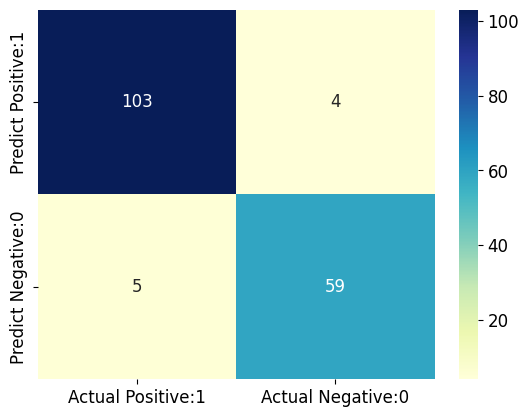

In [58]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       107
           1       0.94      0.92      0.93        64

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [35]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9474


In [36]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0526


In [59]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9626


In [60]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9537


In [39]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0635


In [40]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9365


Experimenting with different threshold values

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score

for i in range(1, 5):
    cm1 = 0
    y_pred1 = logreg.predict_proba(X_test)[:, 1]
    threshold = i / 10
    y_pred2 = (y_pred1 > threshold).astype(int)
    cm1 = confusion_matrix(y_test, y_pred2)

    print(
        'With',
        threshold,
        'threshold the Confusion Matrix is ',
        '\n\n',
        cm1,
        '\n\n',
        'with',
        cm1[0, 0] + cm1[1, 1],
        'correct predictions, ',
        '\n\n',
        cm1[0, 1],
        'Type I errors( False Positives), ',
        '\n\n',
        cm1[1, 0],
        'Type II errors( False Negatives), ',
        '\n\n',
        'Accuracy score: ',
        accuracy_score(y_test, y_pred2),
        '\n\n',
        'Sensitivity: ',
        cm1[1, 1] / (float(cm1[1, 1] + cm1[1, 0])),
        '\n\n',
        'Specificity: ',
        cm1[0, 0] / (float(cm1[0, 0] + cm1[0, 1])),
        '\n\n',
        '====================================================',
        '\n\n',
    )


With 0.1 threshold the Confusion Matrix is  

 [[102   5]
 [  0  64]] 

 with 166 correct predictions,  

 5 Type I errors( False Positives),  

 0 Type II errors( False Negatives),  

 Accuracy score:  0.9707602339181286 

 Sensitivity:  1.0 

 Specificity:  0.9532710280373832 



With 0.2 threshold the Confusion Matrix is  

 [[102   5]
 [  1  63]] 

 with 165 correct predictions,  

 5 Type I errors( False Positives),  

 1 Type II errors( False Negatives),  

 Accuracy score:  0.9649122807017544 

 Sensitivity:  0.984375 

 Specificity:  0.9532710280373832 



With 0.3 threshold the Confusion Matrix is  

 [[103   4]
 [  3  61]] 

 with 164 correct predictions,  

 4 Type I errors( False Positives),  

 3 Type II errors( False Negatives),  

 Accuracy score:  0.9590643274853801 

 Sensitivity:  0.953125 

 Specificity:  0.9626168224299065 



With 0.4 threshold the Confusion Matrix is  

 [[103   4]
 [  5  59]] 

 with 162 correct predictions,  

 4 Type I errors( False Positives),

 In medical or critical applications, a high sensitivity is often desired because it indicates a low rate of missing positive cases, which could be important, especially when the cost of false negatives is high.

So, in general, a higher sensitivity is considered better for such cases.


So we will pick up the model with threshold 0.1

In [61]:
# Set the threshold
threshold = 0.1

# Create a dictionary with class weights
class_weights = {0: threshold, 1: 1 - threshold}

# Instantiate the model with class weights
logreg_1 = LogisticRegression(class_weight=class_weights, random_state=0)

# Fit the model
logreg_1.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.1, 1: 0.9}, random_state=0)

In [62]:
y_pred_test_1 = logreg_1.predict(X_test)

y_pred_test_1

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [44]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test_1)))

Model accuracy score: 0.9708


We have got higher accuracy on the model now, Also it is closer to the training set accuracy, therefore no overfitting also we have accuracy higher than null accuracy too.

In [45]:
# Print the Confusion Matrix and slice it into four categories

from sklearn.metrics import confusion_matrix

cm_1 = confusion_matrix(y_test, y_pred_test_1)

print('Confusion matrix\n\n', cm_1)

print('\nTrue Positives(TP) = ', cm_1[0,0])

print('\nTrue Negatives(TN) = ', cm_1[1,1])

print('\nFalse Positives(FP) = ', cm_1[0,1])

print('\nFalse Negatives(FN) = ', cm_1[1,0])

Confusion matrix

 [[102   5]
 [  0  64]]

True Positives(TP) =  102

True Negatives(TN) =  64

False Positives(FP) =  5

False Negatives(FN) =  0


<Axes: >

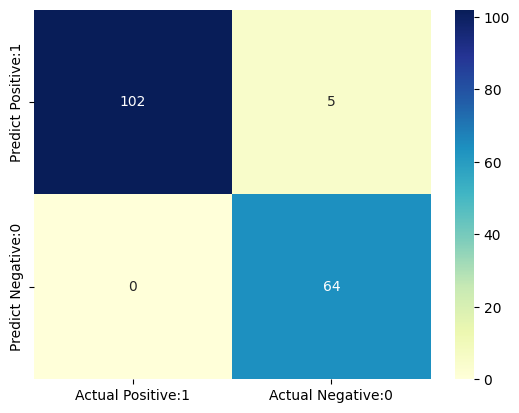

In [46]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm_1, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [47]:
print(classification_report(y_test, y_pred_test_1))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       107
           1       0.93      1.00      0.96        64

    accuracy                           0.97       171
   macro avg       0.96      0.98      0.97       171
weighted avg       0.97      0.97      0.97       171



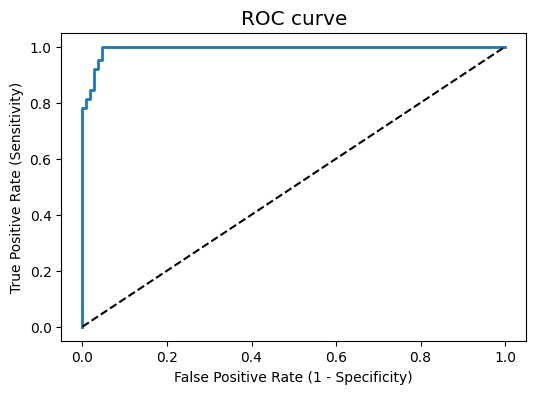

In [48]:
# plot ROC Curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

plt.figure(figsize=(6, 4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0, 1], [0, 1], 'k--')

plt.rcParams['font.size'] = 12

plt.title('ROC curve')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


In [49]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test,y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9936


let us try cross validation to see if it imporves accuracy of our model

In [50]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg_1, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores.mean()))

Cross-validation scores:0.9746240243670284


Comparing with our orginal model score of 0.9708 it has not improved much so we need not apply cross validation

So we are satisifed with our logistic regression model and it does a good job for us in predicting breast cancer at a lower threshold of 0.1.

![](https://contenthub-static.grammarly.com/blog/wp-content/uploads/2019/02/bmd-4584.png)